In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


/home/feodor/.local/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm

import networkx as nx

# Functions

In [3]:
def get_f(x, y, g=lambda t: np.sin(0.5*np.pi*t)**2):
    # 
    x0 = np.array(x)[:-1].reshape(-1, 1)
    x1 = np.array(x)[1:].reshape(-1, 1)
    y0 = np.array(y)[:-1].reshape(-1, 1)
    y1 = np.array(y)[1:].reshape(-1, 1)

    def f(t):
        t = (np.array(t).reshape(1, -1) - x0)/(x1 - x0)
        t[(t < 0) | (t > 1)] = np.nan
        r = y0 + (y1 - y0) * g(t)
        r[np.isnan(r)] = -np.inf
        r = r.max(axis=0)
        r[r == -np.inf] = np.nan
        return r
    return f

# Definitiions

## Shallow Pairs

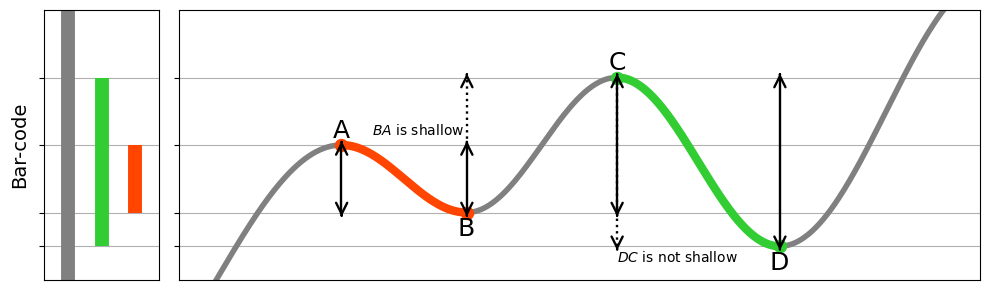

In [4]:
x = np.array([-1, 1, 2, 3.2, 4.5, 6.2])
y = np.array([-4, 4, 2, 6, 1, 9])

f = get_f(x, y)

bd0 = [2, 1]
bd1 = [4, 3]
bd_giant = np.argmin(y), np.argmax(y)

col0 = 'orangered'
col1 = 'limegreen'
col_giant = 'grey'


fig = plt.figure(figsize=(10, 3))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 7])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot the complex
x_vals = np.linspace(0, 15, 1000)
y_vals = f(x_vals)
ax2.plot(x_vals, y_vals, color=col_giant, linewidth=4)

for bd, col in zip([bd0, bd1], [col0, col1]):
    x_vals = np.sort(x[list(bd)])
    x_vals = np.linspace(x_vals[0], x_vals[1], 200)
    y_vals = f(x_vals)
    ax2.plot(x_vals, y_vals, color=col, linewidth=6)
    ax2.scatter(x[list(bd)], y[list(bd)], s=75, color=col, zorder=2)

ax2.text(x[bd0[1]], y[bd0[1]] + 0.07, 'A', fontsize=18, ha='center', va='bottom', color='black')
ax2.text(x[bd0[0]], y[bd0[0]] - 0.14, 'B', fontsize=18, ha='center', va='top', color='black')
ax2.text(x[bd1[1]], y[bd1[1]] + 0.07, 'C', fontsize=18, ha='center', va='bottom', color='black')
ax2.text(x[bd1[0]], y[bd1[0]] - 0.14, 'D', fontsize=18, ha='center', va='top', color='black')


arrow_zorder = 3
arrow_linewidth = 1.7
ax2.plot(x[bd0[0]]*np.ones(2), y[bd0], color='black', linewidth=arrow_linewidth, linestyle='-', zorder=arrow_zorder)
ax2.plot(x[bd0[1]]*np.ones(2), y[bd0], color='black', linewidth=arrow_linewidth, linestyle='-', zorder=arrow_zorder)
ax2.plot(x[bd0[0]]*np.ones(2), y[[bd0[1], bd1[1]]], color='black', linewidth=arrow_linewidth, linestyle=':', zorder=arrow_zorder)
ax2.plot(x[bd1[0]]*np.ones(2), y[bd1], color='black', linewidth=arrow_linewidth, linestyle='-', zorder=arrow_zorder)
ax2.plot(x[bd1[1]]*np.ones(2), y[bd1], color='black', linewidth=arrow_linewidth, linestyle=':', zorder=arrow_zorder)
ax2.plot(x[bd1[1]]*np.ones(2), y[[bd1[1], bd0[0]]], color='black', linewidth=arrow_linewidth, linestyle='-', zorder=arrow_zorder)

down_arrow_points = np.array([(x[bd0[0]], y[bd0[0]]), 
                              (x[bd0[1]], y[bd0[0]]), 
                              (x[bd1[0]], y[bd1[0]]), 
                              (x[bd1[1]], y[bd1[0]]), 
                              (x[bd1[1]], y[bd0[0]]), 
                              ])
up_arrow_points = np.array([(x[bd0[0]], y[bd0[1]]), 
                            (x[bd0[1]], y[bd0[1]]), 
                            (x[bd0[0]], y[bd1[1]]), 
                            (x[bd1[0]], y[bd1[1]]), 
                            (x[bd1[1]], y[bd1[1]]), 
                            ])

arrow_eps = np.array([0, 0.12])
arrow_correction = np.array([0.002, 0])
for point in down_arrow_points:
    arrow = FancyArrowPatch(point + arrow_correction, point + arrow_correction - arrow_eps, 
                            arrowstyle='->', color='black', 
                            mutation_scale=20, linewidth=arrow_linewidth, zorder=3)
    ax2.add_patch(arrow)
for point in up_arrow_points:
    arrow = FancyArrowPatch(point + arrow_correction, point + arrow_correction + arrow_eps, 
                            arrowstyle='->', color='black', 
                            mutation_scale=20, linewidth=arrow_linewidth, zorder=3)
    ax2.add_patch(arrow)

ax2.text(1.99, 4.2, '$BA$ is shallow ', ha='right', va='bottom')
ax2.text(3.2, 0.9, '$DC$ is not shallow ', ha='left', va='top')


# Plot the bar-code
bds = np.array([bd_giant, bd1, bd0])
cols = np.array([col_giant, col1, col0])
cols = cols[np.argsort(y[bds[:, 0]])]
bds = bds[np.argsort(y[bds[:, 0]])]
for i, (bd, col) in enumerate(zip(bds, cols)):
    y_vals = np.array([y[bd[0]], y[bd[1]]])
    ax1.plot(i*np.ones(2), y_vals, color=col, linewidth=10, solid_capstyle='butt')


yticks = np.concatenate([y[bd0], y[bd1]])
ylabels = [''] * len(yticks)

xlims = [-0.3, 6.1]
ylims = [0, 8]

ax1.set_xlim(-0.7, len(bds) - 0.3)
ax2.set_xlim(xlims)

for ax in [ax1, ax2]:
    ax.set_yticks(yticks, ylabels)
    ax.set_xticks([])
    ax.set_ylim(ylims)
    ax.grid(True)

ax1.set_ylabel('Bar-code', fontsize=14)
plt.tight_layout()

plt.savefig('pics/krakow/shallow-pairs.png')

## Depth Poset

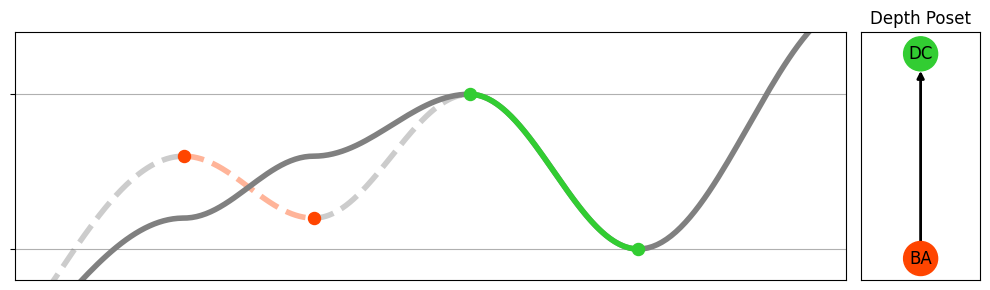

In [5]:
fig = plt.figure(figsize=(10, 3))
gs = gridspec.GridSpec(1, 2, width_ratios=[7, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# plot the cancellation

#x_new = np.array([-1, 3.2, 4.5, 6.2])
#y_new = np.array([-4, 6, 1, 9])
x_new = np.array([-1, 1, 2, 3.2, 4.5, 6.2])
y_new = np.array([-4, 2, 4, 6, 1, 9])

f_new = get_f(x_new, y_new)

x_vals = np.linspace(x[0], min(x[bd0]), 200)
y_vals = f(x_vals)
ax1.plot(x_vals, y_vals, color=col_giant, linestyle='--', linewidth=4, alpha=0.4)
x_vals = np.linspace(min(x[bd0]), max(x[bd0]), 200)
y_vals = f(x_vals)
ax1.plot(x_vals, y_vals, color=col0, linestyle='--', linewidth=4, alpha=0.4)
x_vals = np.linspace(max(x[bd0]), min(x[bd1]), 200)
y_vals = f(x_vals)
ax1.plot(x_vals, y_vals, color=col_giant, linestyle='--', linewidth=4, alpha=0.4)


x_vals = np.linspace(min(x), max(x), 200)
y_vals = f_new(x_vals)
ax1.plot(x_vals, y_vals, color=col_giant, linewidth=4)

x_vals = np.linspace(min(x[bd1]), max(x[bd1]), 200)
y_vals = f_new(x_vals)
ax1.plot(x_vals, y_vals, color=col1, linestyle='-', linewidth=4, alpha=1.0)


for bd, col in zip([bd0, bd1], [col0, col1]):
    x_vals = np.sort(x[list(bd)])
    x_vals = np.linspace(x_vals[0], x_vals[1], 200)
    y_vals = f(x_vals)
    ax1.scatter(x[list(bd)], y[list(bd)], s=75, color=col, zorder=2)

yticks = np.concatenate([y[bd0], y[bd1]])
yticks = y[bd1]
ylabels = [''] * len(yticks)

ax1.set_yticks(yticks, ylabels)
ax1.set_xticks([])

ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.grid(True)

# plot the depth poset
dpg = nx.DiGraph()
dpg.add_nodes_from(['BA', 'DC'])
dpg.add_edge('BA', 'DC')
dpg_pos = {'BA': (0, 0), 'DC': (0, 1)}
dpg_colors = [col0, col1]

ax2.set_title("Depth Poset")
nx.draw_networkx(dpg, pos=dpg_pos, node_color=dpg_colors, node_size=600, width=2, ax=ax2)

plt.tight_layout()
plt.savefig('pics/krakow/shallow-pairs-cancellation.png')

# Shallow Orders

In [6]:
def plot_barcode(y, bd_pairs=[], bd_colors=[], linewidth=8, ax=None):
    if ax is None:
        ax = plt.gca()
    
    bds = np.array(bd_pairs)
    cols = np.array(bd_colors)
    cols = cols[np.argsort(y[bds[:, 0]])]
    bds = bds[np.argsort(y[bds[:, 0]])]
    for i, (bd, col) in enumerate(zip(bds, cols)):
        ax.plot(i*np.ones(2), y[bd], color=col, linewidth=linewidth, solid_capstyle='butt')


In [7]:
def get_shallow_status(y, bds):
    # Функция работает примитивно только для этого частного случая
    status = np.ones(len(bds), dtype=bool)
    for i, (birth, death) in enumerate(bds):
        status[i] = abs(birth - death) == 1
        
    return status

In [8]:
def plot_function_representation(x0, x1, x, y, main_color='grey', bd_pairs=[], bd_colors=[], bd_shallow_status=None, 
                                 linewidth=4, linestyle='-', birth_marker='o', birth_size=80, alpha=1.,
                                 n=1000, ax=None, zorder=3):
    # 
    if ax is None:
        ax = plt.gca()
    if bd_shallow_status is None:
        bd_shallow_status = get_shallow_status(y, bd_pairs)

    f = get_f(x, y)

    parts_starts_ends = np.array([x[bd] for bd in bd_pairs])
    parts_starts_ends = np.sort(parts_starts_ends, axis=1)
    parts_starts_ends = parts_starts_ends[bd_shallow_status]
    parts_colors = np.array(bd_colors)[bd_shallow_status]
    parts_colors = parts_colors[np.argsort(parts_starts_ends[:, 0])]
    parts_starts_ends = parts_starts_ends[np.argsort(parts_starts_ends[:, 0])]
    for (t0, t1), color in zip(parts_starts_ends, parts_colors):
        x_vals = np.linspace(t0, t1, n)
        y_vals = f(x_vals)
        ax.plot(x_vals, y_vals, linewidth=linewidth, linestyle=linestyle, color=color, zorder=zorder, alpha=alpha)
    for (birth, death), color, shallow_status in zip(bd_pairs, bd_colors, bd_shallow_status):
        point_color = color if shallow_status else main_color
        ax.scatter(x[birth], y[birth], color=point_color, marker=birth_marker, s=birth_size, zorder=zorder + 1, alpha=alpha)



    parts_main = np.transpose([np.append(x0, parts_starts_ends[:, 1]), 
                               np.append(parts_starts_ends[:, 0], x1)])
    for t0, t1 in parts_main:
        x_vals = np.linspace(t0, t1, n)
        y_vals = f(x_vals)
        ax.plot(x_vals, y_vals, linewidth=linewidth, linestyle=linestyle, color=main_color, zorder=zorder, alpha=alpha)

In [9]:
def define_text_parameters(i, x, y, index_names, color='black', fontsize='large', fontweight='normal', zorder=4):
    res_x = x[i]
    res_y = y[i]
    try:
        text = index_names[i]
    except KeyError:
        text = ''
    if y[i] == max(y):
        ha, va ='left', 'top'
    elif y[i] == min(y):
        ha, va ='right', 'bottom'
    elif y[i] > y[i + 1]:
        ha, va ='right', 'bottom'
    else:
        ha, va ='left', 'top'
    return {'x': res_x, 'y': res_y, 's': text, 'ha': ha, 'va': va, 'color': color, 'fontsize': fontsize, 'fontweight':fontweight, 'zorder': zorder}


def name_points(x, y, index_names, index=[], color='black', fontsize='large', fontweight='normal', ax=None, zorder=4):
    # 
    if ax is None:
        ax = plt.gca()
    for i in index:
        ax.text(**define_text_parameters(i, x, y, index_names, color=color, fontsize=fontsize, fontweight=fontweight, zorder=zorder))
    

In [10]:
def anotate_shallow_status(x, y, index_names, bd_pairs=[], bd_colors=[], bd_shallow_status=None, linewidth=1.2, zorder=2, ax=None):
    # 
    if ax is None:
        ax = plt.gca()
    if bd_shallow_status is None:
        bd_shallow_status = get_shallow_status(y, bd_pairs)
    
    for (birth, death), color, shallow_status in zip(bd_pairs, bd_colors, bd_shallow_status):
        if not shallow_status:
            describted = False

            min_cofacet = birth - 1 if y[birth - 1] < y[birth + 1] else birth + 1
            if y[min_cofacet] < y[death]:
                p0 = (x[death], y[death])
                p1 = (x[death], y[birth])
                ax.annotate('', xy=p0, xytext=p1, arrowprops=dict(arrowstyle='<->', linestyle='-', linewidth=linewidth, color=color), zorder=zorder)
                ax.plot(x[[death, birth]], y[[birth, birth]], color=color, linewidth=linewidth, linestyle='-.', zorder=zorder)
                ax.text(x[[birth, death]].mean(), y[birth], f'({index_names[birth]}, {index_names[death]}) is not shallow', ha='center', va='top')
                describted = True

                p0 = (x[min_cofacet], y[min_cofacet])
                p1 = (x[min_cofacet], y[birth])
                ax.annotate('', xy=p0, xytext=p1, arrowprops=dict(arrowstyle='<->', linestyle='-', linewidth=linewidth, color=color), zorder=zorder)
                
            max_facet = death - 1 if y[death - 1] > y[death + 1] else death + 1
            if y[max_facet] > y[birth]:
                p0 = (x[birth], y[death])
                p1 = (x[birth], y[birth])
                ax.annotate('', xy=p0, xytext=p1, arrowprops=dict(arrowstyle='<->', linestyle='-', linewidth=linewidth, color=color), zorder=zorder)
                ax.plot(x[[birth, death]], y[[death, death]], color=color, linewidth=linewidth, linestyle='-.', zorder=zorder)
                if not describted:
                    ax.text(x[[birth, death]].mean(), y[death], f'({index_names[birth]}, {index_names[death]}) is not shallow', ha='center', va='bottom')
                p0 = (x[max_facet], y[max_facet])
                p1 = (x[max_facet], y[death])
                ax.annotate('', xy=p0, xytext=p1, arrowprops=dict(arrowstyle='<->', linestyle='-', linewidth=linewidth, color=color), zorder=zorder)
        else:
            pass


In [11]:
def plot_complex(x, y, index_names, x0=None, x1=None, 
                 bd_pairs=[], bd_colors=[], bd_shallow_status=None, 
                 main_color='grey', linewidth=4, size=100, 
                 name_color='black', name_size='large', name_weight='bold', name_y=-0.01, 
                 filtration_color='green', filtration_size='medium', filtration_weight='medium', filtration_y=0.01, 
                 ax=None):
    # 
    if ax is None:
        ax = plt.gca()
    
    if bd_shallow_status is None:
        bd_shallow_status = get_shallow_status(y, bd_pairs)
    
    if x0 is None:
        x0 = min(x)
    if x1 is None:
        x1 = max(x)
    ax.plot([x0, x1], [0, 0], linewidth=linewidth, color=main_color, zorder=0)
    for birth, _ in bd_pairs:
        ax.scatter(x[birth], 0, marker='o', s=size, color=main_color, zorder=0)

    for (birth, death), color, status in zip(bd_pairs, bd_colors, bd_shallow_status):
        if status:
            linestyle = '-'
            marker = 'o'
            s = size
        else:
            linestyle = ':'
            marker = 'X'
            s = 0.5**0.5 * size
        ax.plot(x[[death - 1, death + 1]], [0, 0], linewidth=linewidth, linestyle=linestyle, color=color, zorder=1)
        ax.scatter(x[birth], 0, color=color, marker=marker, s=s, zorder=2)

    for i in index_names.keys():
        ax.text(x[i], name_y, index_names[i], color=name_color, size=name_size, weight=name_weight, 
                ha='center', va='top' if name_y < 0 else 'bottom')
        ax.text(x[i], filtration_y, y[i], color=filtration_color, size=filtration_size, weight=filtration_weight, 
                ha='center', va='top' if filtration_y < 0 else 'bottom')


    

In [12]:
level_heights = np.arange(8)
level_labels = np.concatenate([[r'$-\infty$'], np.arange(len(level_heights) - 2).astype(str), [r'$+\infty$']])
ylims = min(level_heights), max(level_heights)

In [13]:
y = level_heights[np.array([0, 4, 2, 6, 3, 5, 1, 7, 7])]
x = np.cumsum(np.append(0, np.max([abs(y[1:] - y[:-1]), 0.001*np.ones(len(y) - 1)], axis=0)**0.2))
f = get_f(x, y)

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

f = get_f(x, y)

index_names = {
    1: r'$d$', 
    2: r'$A$', 
    3: r'$e$', 
    4: r'$B$', 
    5: r'$f$',
    6: r'$C$', 
    -2: r'$g$',
}
for i in list(index_names.keys()):
    if i < 0:
        index_names.update({len(x) + i: index_names[i]})

In [14]:
bd0 = [2, 1]
bd1 = [4, 5]
bd2 = [6, 3]
bd_giant = [0, -2]

col0 = 'limegreen'
col1 = 'dodgerblue'
col2 = 'orangered'
col_giant = 'grey'

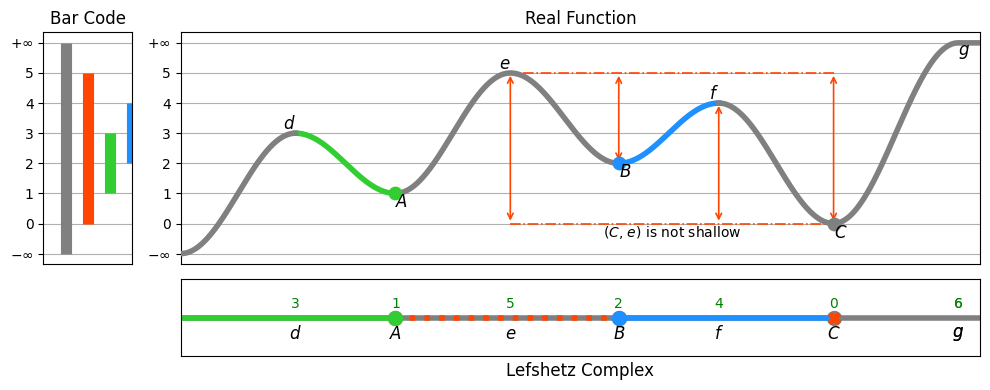

In [15]:
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 9], height_ratios=[3, 1])

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 1])

# BarCode
plot_barcode(y, bd_pairs=[bd0, bd1, bd2, bd_giant], bd_colors=[col0, col1, col2, col_giant], ax=ax0)
ax0.set_yticks(level_heights, level_labels)
ax0.set_xticks([])
ax0.set_xlim(-1, len(bds))
#ax1.set_ylim(ymin, ymax
ax0.grid(True)

# Real Function Representation
plot_function_representation(xmin, xmax, x, y, bd_pairs=[bd0, bd1, bd2], bd_colors=[col0, col1, col2], linestyle='-', alpha=1.0, ax=ax1)
name_points(x, y, index_names, index=np.arange(len(x)), ax=ax1)
anotate_shallow_status(x, y, index_names, bd_pairs=[bd0, bd1, bd2], bd_colors=[col0, col1, col2], ax=ax1)
ax1.set_yticks(level_heights, level_labels)
ax1.set_xticks([])
ax1.set_xlim(xmin, xmax)
#ax1.set_ylim(ymin, ymax)
ax1.grid(True, zorder=-1)

# Lefshetz Complex
plot_complex(x, y - 1, index_names, bd_pairs=[bd0, bd1, bd2], bd_colors=[col0, col1, col2], x0=xmin, x1=xmax, ax=ax2)
ax2.set_xticks([])
ax2.set_xlim(xmin, xmax)
ax2.set_yticks([])



fontsize=12
ax0.set_title('Bar Code', fontsize=fontsize)
ax1.set_title('Real Function', fontsize=fontsize)
ax2.set_xlabel('Lefshetz Complex', fontsize=fontsize)

plt.tight_layout()
